In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, 'C:/Users/grzesiek/Documents/Data Science/PycharmProjects/ML_from_scratch')
%matplotlib notebook

In [2]:
cd ..

/home/grzegorz/Projects/ML_from_scratch


In [3]:
from linear_regression import LinearRegression

In [4]:
help(LinearRegression)

Help on class LinearRegression in module linear_regression:

class LinearRegression(builtins.object)
 |  This class represents a simple linear regression model which uses gradient descent for training.
 |  
 |  Attributes:
 |      lr: A float representing the learning rate for gradient descent.
 |      n_iters: An integer for the number of iterations for the gradient descent loop.
 |      weights: A numpy array of feature weights (will be initialized in the fit method).
 |      bias: A float for the bias term (will be initialized in the fit method).
 |  
 |  Methods defined here:
 |  
 |  __init__(self, lr:float=0.001, n_iters:int=1000)
 |      The constructor for LinearRegression class.
 |      
 |      Parameters:
 |          lr: The learning rate for gradient descent (default is 0.001).
 |          n_iters: The number of iterations for the gradient descent loop (default is 1000).
 |  
 |  fit(self, X:numpy.ndarray, y:numpy.ndarray) -> None
 |      This method trains the linear regre

In [5]:
dir(LinearRegression)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'fit',
 'predict']

# 1d example

In [21]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [22]:
regressor = LinearRegression(lr=0.01)
regressor.fit(X_train, y_train)

predicted = regressor.predict(X_test)
mean_squared_error(y_test, predicted)

305.7719958301902

<IPython.core.display.Javascript object>


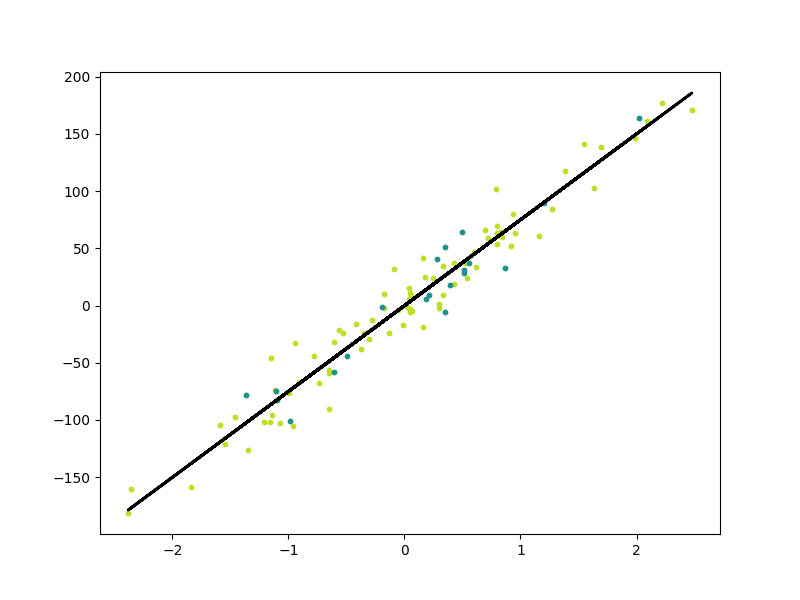

In [23]:
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='k', linewidth=2, label="prediction")
plt.show()

# 2D example

In [24]:
X, y = datasets.make_regression(n_samples=1000, n_features=2, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [25]:
regressor = LinearRegression(lr=0.1)
regressor.fit(X_train, y_train)

predicted = regressor.predict(X_test)
mean_squared_error(y_test, predicted)

388.88161947807237

In [26]:
weights = regressor.weights
bias = regressor.bias

<IPython.core.display.Javascript object>


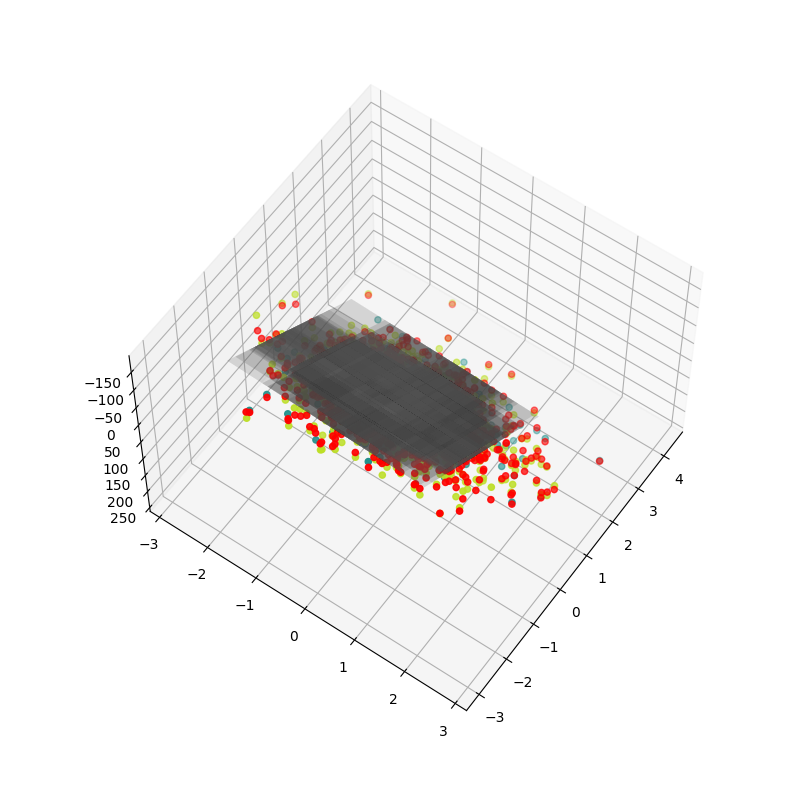

In [28]:
y_pred_plane = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
m1 = ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color=cmap(0.9))
m2 = ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color=cmap(0.5))
Xnew, Ynew = np.meshgrid(X[:, 0], X[:, 1])
Znew = weights[0]*Xnew + weights[1]*Ynew + bias
ax.scatter(X[:, 0], X[:, 1], y_pred_plane, color='red')
ax.plot_surface(Xnew, Ynew, Znew, linewidth=0, color='grey', alpha=0.05)
plt.show()